# Take Home Assessment for Education Super Highway

Megan Riley

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Files and this file are on git for viewing, Assuming it is okay because working with census data
households_git_link = "https://raw.githubusercontent.com/megnn/takehomeassessment/main/households_and_families.csv"
internet_git_link = "https://raw.githubusercontent.com/megnn/takehomeassessment/main/internet_subscription.csv"
households = pd.read_csv(households_git_link, skiprows = 1)
internet = pd.read_csv(internet_git_link, skiprows = 1)
print("Households Shape: ")
print(households.shape)

print("Internet Shape: ")
print(internet.shape)


Households Shape: 
(52, 182)
Internet Shape: 
(52, 310)


### Cleaning
#### Cleaning Column Names

Census Columns follow a particular formatting where each column name follows a format adding additional information.
Each column begins with 'Estimate!!' or 'Margin of Error!!' to indicate that it is the Census bureau's estimate of a
variable and the margin of error of that variable.

I will assume that this analysis will not need to take margin of error into account.
Given this, I will drop all Margin of error columns from further analysis and leave the data with the base estimates.
Without the margins of error columns we have half the columns from the original data sources.

I also replace exclamation points with underscores for easier reading. This does not leave the columns in perfect
readable condition but works in this case for working in a short time frame. If I were processing this data for an analysis
and exporting the data out to others to view I would spend some additional time changing column names to make it easier to
view the data or add a data dictionary explaining the column groupings and subgroupings they can expect to see.

In [4]:
#Step One
##Drop the margin of error columns
internet = internet.drop(list(internet.filter(regex='Margin of Error')), axis =1)

#Remove Estimate mention, replace !! with _
internet.columns = internet.columns.str.replace('Estimate!!','')
internet.columns = internet.columns.str.replace('!!','_')

#Repeat for Households
households = households.drop(list(households.filter(regex = 'Margin of Error')),axis = 1)
households.columns = households.columns.str.replace('Estimate!!','')
households.columns = households.columns.str.replace('!!','_')


#### NA Values

After exploring the data, NA values tend to be written with capital N. To explore replacing or ignoring NA values
I will first convert every 'N' character to the numpy NAN value. Within the households data set, several columns are marked
entirely by the (X) string. Without need for those variables I converted those to NA values as well to eliminate issues.

After converting to NA values, I noted the inclusion of the N character coerced the columns it was a part of to a string type.
Therefore, to reset that conversion I converted all but the first two columns in both sets of data to numeric type.

With that I list and show the NA value counts for a few of the variables necessary in the first few questions. There is a pattern
to the NA counts where for each category(access to computer, etc) there are the same counts of NAs across several sub categories of race. For example
every sub category of Race of Asian includes nine states that reported no data breakdown. Most glaring is the Native Hawaiian and
Other Pacific Islander subcategory where 41 of the states and territories returned no data. For all these racial groups the average
data averages will be based on a subset of states not the full national picture.

Moving forward with this NAs I will work off the assumption the best path will be to ignore the NA values to build national numbers rather than follow
a strategy to impute values. This is reflective of the fact that there are also NA values on the total populations of these
racial subgroups overall for the states that don't have racial subgroup information regarding internet access. It is likely these
states have very small groups of the given racial sub-group. But it is worth noting the number is likely rarely zero and to not
discount the fact that these populations may exist without being counted here.

In [5]:
#Replace N and (X) with nan and turn all columns numeric
internet = internet.replace('N',np.nan)
internet.iloc[:,2:] = internet.iloc[:,2:].apply(pd.to_numeric)

households = households.replace('N',np.nan)
households = households.replace('(X)',np.nan)
households.iloc[:,2:] = households.iloc[:,2:].apply(pd.to_numeric)

#Show # of Nans
nas_count = internet.isna().sum()
for i in range(51,56):
    print(internet.columns[i]," NA Values: ",nas_count[i])
for i in range(139,144):
    print(internet.columns[i]," NA Values: ",nas_count[i])


Percent  Broadband Internet Subscription_With a computer_Total population in households_RACE AND HISPANIC OR LATINO ORIGIN_Black or African American alone  NA Values:  6
Percent  Broadband Internet Subscription_With a computer_Total population in households_RACE AND HISPANIC OR LATINO ORIGIN_American Indian and Alaska Native alone  NA Values:  7
Percent  Broadband Internet Subscription_With a computer_Total population in households_RACE AND HISPANIC OR LATINO ORIGIN_Asian alone  NA Values:  9
Percent  Broadband Internet Subscription_With a computer_Total population in households_RACE AND HISPANIC OR LATINO ORIGIN_Native Hawaiian and Other Pacific Islander alone  NA Values:  41
Percent  Broadband Internet Subscription_With a computer_Total population in households_RACE AND HISPANIC OR LATINO ORIGIN_Some other race alone  NA Values:  6
Percent no computer in household_Total population in households_RACE AND HISPANIC OR LATINO ORIGIN_Black or African American alone  NA Values:  6
Percent 

## Questions One and Two
**Question One:**

A. What is the race breakdown nationally of populations that have a computer but lack an internet subscription?
B. And what is the race breakdown nationally of populations without a computer?

**Question Two:**
Create a chart that visualizes these racial breakdowns.

I will work with the assumption that the best way to compare these race breakdowns nationally is by percentage without access
to either a computer or access to a computer but without an Internet subscription. This will highlight some inequalities
across racial lines and let us see how smaller sub-groups can be worse affected. But this approach won't have the advantage
of showing where the large numbers of lack of Internet access lie.

I begin to tackle questions one and two overall below. In order to tackle these, I explored and subsetted the data to
include for the first part of question one, the columns under the label 'Percent without an Internet Subscription_With a computer'
that label is subdivided by racial categories, education and age categories, so for this question I pulled out the racial
sub categories as well as the total population percentages.

For the second part of the first question I pulled the similar groupings but under the larger label of 'Percent no computer in household'.

With both of these sets of variables I gathered the average values for national measurements and listed them in a table
as well as assembling them in clear visual bar plots to compare.


There should be caution interpreting Native Hawaiian and Pacific Islander numbers as they only report from 9 states and territories.
However, one of those states does include Hawaii itself and other states with large populations of pacific islanders such as California
so it is likely we still see a large portion of that population represented even with the many missing states.


In [6]:
#Names used as reference, cleaner short versions for graphing and description
#Note, the column names overall are difficult to read. If this was a process of exporting the csvs for others
## I would edit the names to make them more concise as well.
cleaner_names = ['Total','White Overall','Black or African American','American Indian and Alaska Native','Asian',
                 'Native Hawaiian and Other Pacific Islander','Some Other Race','Two or More Races',
                 'Hispanic or Latino', 'White Not Hispanic or Latino']

q1_values = []
#These are the variable locations of every variable to do with racial breakdown of those with computers and no internet
race_comp_wout_broadband_var = [90,94,95,96,97,98,99,100,101,102]
q1_subset = internet.iloc[:,race_comp_wout_broadband_var]

#For each of the given variables we are taking the mean percentage value across all values in all states
for i in q1_subset.columns:
    q1_values.append(q1_subset[i].mean(skipna = True))
d = {'Names':cleaner_names, 'Percentage': q1_values}
# A new dataframe for plotting
q1_a_new_df = pd.DataFrame(d)

In [7]:
#These are the variable locations of each variable to do w/ racial breakdown of those w/out computers
race_no_comp_var = [134,138,139,140,141,142,143,144,145,146]
q1b_subset = internet.iloc[:,race_no_comp_var]

#Like before we are building average values of
q1b_values = []
for i in q1b_subset.columns:
    q1b_values.append(q1b_subset[i].mean(skipna = True))

d2 = {'Names':cleaner_names, 'Percentage': q1b_values}
q1_b_new_df = pd.DataFrame(d2)


#### Percentage of Population by Racial Category Nationally with Computers but without Internet

| Category | Percentage
| :-: | :-: |
| Total | 6.2% |
| White Overall | 5.6% |
| Black or African American | 8.4% |
| American Indian and Alaska Native | 10.3% |
| Asian | 3.8% |
| Native Hawaiian and Other Pacific Islander | 14% |
| Some Other Race | 10.2%|
| Two or More Races | 5.2%|
| Hispanic or Latino | 8.1%|
| White Not Hispanic or Latino | 5.3% |

With this table and graph below we can see in much higher numbers are the Native Hawaiian and Other Pacific Islander sub groups.
Nearly one in seven of this group has no access to internet despite having a computer accessible.


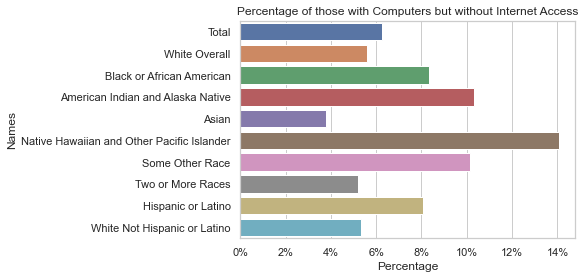

In [15]:
#Plotting the percentages of those with computers but without access broken down by race

sns.set_theme(style='whitegrid')
q1_plot = sns.barplot(y = 'Names', x = 'Percentage', data = q1_a_new_df).set(title = "Percentage of those with Computers but without Internet Access")
plt.xticks([0,2,4,6,8,10,12,14],['0%','2%','4%','6%','8%','10%','12%','14%']);

#### Percentage of Population by Racial Category Nationally without Computers

| Category | Percentage
| :-: | :-: |
| Total |  4.9% |
| White Overall | 4.5% |
| Black or African American | 6.5% |
| American Indian and Alaska Native | 8.9% |
| Asian | 1.7% |
| Native Hawaiian and Other Pacific Islander | 8.8% |
| Some Other Race | 5%|
| Two or More Races | 2.7%|
| Hispanic or Latino | 4.1%|
| White Not Hispanic or Latino | 4.4% |

Like before we see the Native Hawaiian and Pacific Islander group have high levels of no access to computers in their household
however we also see that American Indian and Alaska Native populations have similar numbers of those without access to a computer.
Overall access to a computer without internet connectivity is more common than no access to a computer at all.

Monetary or location reasons can contribute to this difference as a computer can be a rare if not one time purchase that can
 be purchased while someone is in transit far away from their home while internet access is a regular bill that needs to be
 delivered to a person's home, which can be prohibitively expensive for some neighborhoods.

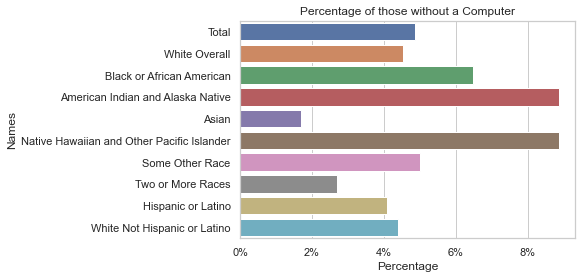

In [11]:
#Plotting percentage of those without a computer by racial breakdown
sns.set_theme(style='whitegrid')
q1_plot = sns.barplot(y = 'Names', x = 'Percentage', data = q1_b_new_df).set(title = "Percentage of those without a Computer")
plt.xticks([0,2,4,6,8],['0%','2%','4%','6%','8%']);

### Questions Three

**Question Three:** How Many Households does the above represent?

I assume we are looking at total households without breaking it down into sub categories of households, and that including
the racial breakdown is important.

First below I have the simple calculations for total households represented as those without computers in household
or without internet subscriptions. There are approximately 7 million and 736 thousand households without computers.
And an additional over 6 million households with computers but without internet subscriptions.

Overall this shows more than 13.75 million households are without access to the internet. That total
number of households is more than any one state has to their name. This total calculation comes from the households data
where there is a clear count of total households by state.

To fully explore the number of households without connectivity by race sub-groups we need a count
of households by race group. However, there is no exact count given that offers this information.

Since I have total populations of each race group by state and an average household size available I will
make an estimated household count for each race group documented in the first two questions to fully explore the
number of households affected by lack of internet subscriptions.

In [17]:
total_house_wout_comp = round(households.iloc[:,2].sum() * (q1_values[0])/100)
total_house_wout_int = round(households.iloc[:,2].sum() * (q1b_values[0])/100)
total_no_int_house = total_house_wout_comp + total_house_wout_int
print("There are a total of ", total_house_wout_comp, " households without computers and ",
      total_house_wout_int, " households with computers but without internet.")
print("This gives us a total of ", (total_house_wout_int + total_house_wout_comp)," households without access to internet.")

There are a total of  7736444  households without computers and  6031804  households with computers but without internet.
This gives us a total of  13768248  households without access to internet.


In [18]:
#race populations overall divided by avg household overall give overall households # for breakdown
Avg_household_size = households.iloc[:,3]

#Total populations of race categories divided by household size by state then summed gives total # households
race_vars_totals = internet.iloc[:,[2,6,7,8,9,10,11,12,13,14]]
race_vars_households = list(race_vars_totals.divide(Avg_household_size, axis ='index').sum())

#households no Internet w Computer
no_int_households = np.multiply(race_vars_households, q1_values)
#Households no Computer
no_comp_households = np.multiply(race_vars_households, q1b_values)

#Turning both sets of households into dataframes for plotting
household_dict_no_comp = {'Names':cleaner_names, 'Households': no_comp_households}
households_df_no_comp = pd.DataFrame(household_dict_no_comp)

household_dict_no_int = {'Names':cleaner_names, 'Households': no_int_households}
households_df_no_int = pd.DataFrame(household_dict_no_int)

Now we can see a new dimension to the lack of access in internet both with and without a computer in the household.
While as a percentage, groups like Native Hawaiian and Pacific Islander and American Indian and Alaska Native stood out.
Both groups represent a much smaller proportion of actual number of households without internet access even while they disproportionately
find themselves without access other groups have.

It is important to note that the numbers don't entirely add up to the Total number of households shown. First this is an
estimated column, and may suffer in precision from that estimation. In addition, the 'White overall' column is included.
'White overall' includes both those who consider themselves 'White and Hispanic or Latino' or 'White and not Hispanic or Latino'.
These designations don't always add up evenly and there can be crossover between these categories. So generally adding up all
the racial sub categories will result in a larger number than our total counts.

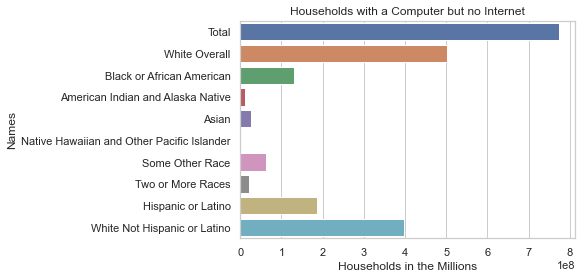

In [19]:
sns.set_theme(style='whitegrid')
q3a_plot = sns.barplot(y = 'Names', x = 'Households', data = households_df_no_int).set(title = "Households with a Computer but no Internet")
plt.xlabel("Households in the Millions");

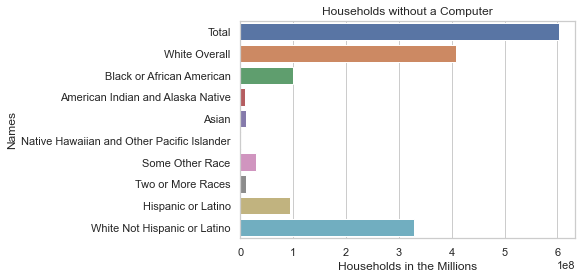

In [20]:
sns.set_theme(style='whitegrid')
q3b_plot = sns.barplot(y = 'Names', x = 'Households', data = households_df_no_comp).set(title = "Households without a Computer")
plt.xlabel("Households in the Millions");

### Question Four

Question Four: What are the top 5 states that have the highest percentages of their population that have a computer but
lack an internet subscription and populations without a computer (combine these two categories)?


To create a combined measure I combined the percent of the population without a computer in their household and the percent
of the population with a computer but without Internet subscription. Nationally this averages to about 11% of people overall
who do not have internet access. The top five states and territories are listed below. I am assuming this question takes
Puerto Rico as a state given it is a part of the data set despite it's position as a territory legally. If we were to assume
that Puerto Rico was excluded this top five list would include Alabama as the fifth state with a lack of internet access rate at 14.6%.

Three of our top five states (four if including Alabama) hail from the south-east part of the country and show there is
some larger legacy of inaccessibility that may be regional to the south. If county level data is available here, it would
be interesting to explore that relationship further to see what potential geographical patterns exist.

Below I printed out the list of states by printing out the dataframe directly whereas earlier I took a different approach
to manually build the tables in markdown just to show a few different approaches I could take to presentation.

In [24]:
internet['Total_No_Internet_Access'] = internet['Percent no computer in household_Total population in households'] + \
                                       internet['Percent without an Internet Subscription_With a computer_Total population in households']

top_five = internet.loc[:,['Geographic Area Name','Total_No_Internet_Access']]
top_five.sort_values(by = 'Total_No_Internet_Access',ascending = False).head(5)


,Geographic Area Name,Total_No_Internet_Access
51,Puerto Rico,26.4
24,Mississippi,18.4
31,New Mexico,18.2
3,Arkansas,15.8
18,Louisiana,15.6


**Question Five: Adding More Analysis!**

I was still curious about the relationship of our racial sub-groups and total population when it comes to lack of access.
I focused on the variable set of those with computers but without internet access. And to further explore plotted all these
variables on a scatterplot. Theoretically if there is no inequity between racial groups, the percentages should rise similar to
the total measure on the X axis. Of course that doesn't hold true, there is unequal access to Internet.

One interesting trend I see is that as total access increases by state, the spread of the sub groups increases. So when a state's
total lack of access hovers low around 4%, there is some grouping between all the racial sub groups, but for the few states with
high lack of access, there is high disparity between racial groups. Often this puts Native populations, and occasionally the 'other'
race group higher than others like Asian and White Non Hispanic populations.

I also noticed on large outlier where a proportion hits almost 50% with no internet access, well above everyone else. Which
I pull out and show below.

<AxesSubplot:xlabel='Total Percent', ylabel='Percent Lacking Internet Access with Computers'>

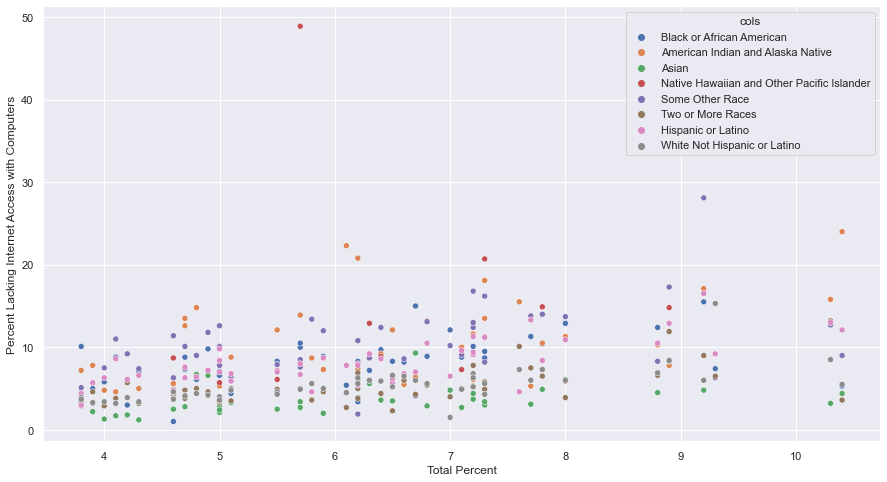

In [58]:
#Grabbing variables again, these are for percentages of those w/out internet but with computers
tempvars = [90,95,96,97,98,99,100,101,102]
no_int_subset = internet.iloc[:,tempvars]
#Adding cleaner labels
no_int_subset.columns = ['Total Percent','Black or African American','American Indian and Alaska Native','Asian',
                 'Native Hawaiian and Other Pacific Islander','Some Other Race','Two or More Races',
                 'Hispanic or Latino', 'White Not Hispanic or Latino']
#Melting the data to make a scatterplot
dfm = no_int_subset.melt('Total Percent', var_name='cols', value_name='Percent Lacking Internet Access with Computers')

sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(x = "Total Percent", y = "Percent Lacking Internet Access with Computers", hue ='cols', data = dfm)

To explore this outlier, I pulled up the record below. The first two columns are population numbers followed by percentages.
Overall it is a large outlier of a small population of Native Hawaiian and Pacific Islanders in Michigan that have
computers but no internet subscriptions.

Considering this population also only has 4.7% without computers at all, this outlier is interesting and could be indicative
of some illustrative behavior with more research.

In [61]:
#Pulling the variables to do with access and population overall and for our Native Hawaiian and Pacific Islander Population
outlier_check_var = [1,2,10,90,98,134,142]
col_names = ['State','Total Pop','Native Hawaiian and Pacific Islander Population', 'Total without Internet with Computer',
             'Native Hawaiian and Pacific Islander without Internet with Computer', 'Total without Computers',
             'Native Hawaiian and Pacific Islander without Computers']
outlier_check = internet.iloc[:,outlier_check_var]
outlier_check.columns = col_names
outlier_check.sort_values(by = 'Native Hawaiian and Pacific Islander without Internet with Computer',ascending = False).head(1)




,State,Total Pop,Native Hawaiian and Pacific Islander Population,Total without Internet with Computer,Native Hawaiian and Pacific Islander without Internet with Computer,Total without Computers,Native Hawaiian and Pacific Islander without Computers
22,Michigan,9763358,2025.0,5.7,48.9,4.7,6.8
